In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline
sns.set(font_scale = 1)
sns.set_style("ticks")
plt.rcParams["font.family"] = "sans-serif"


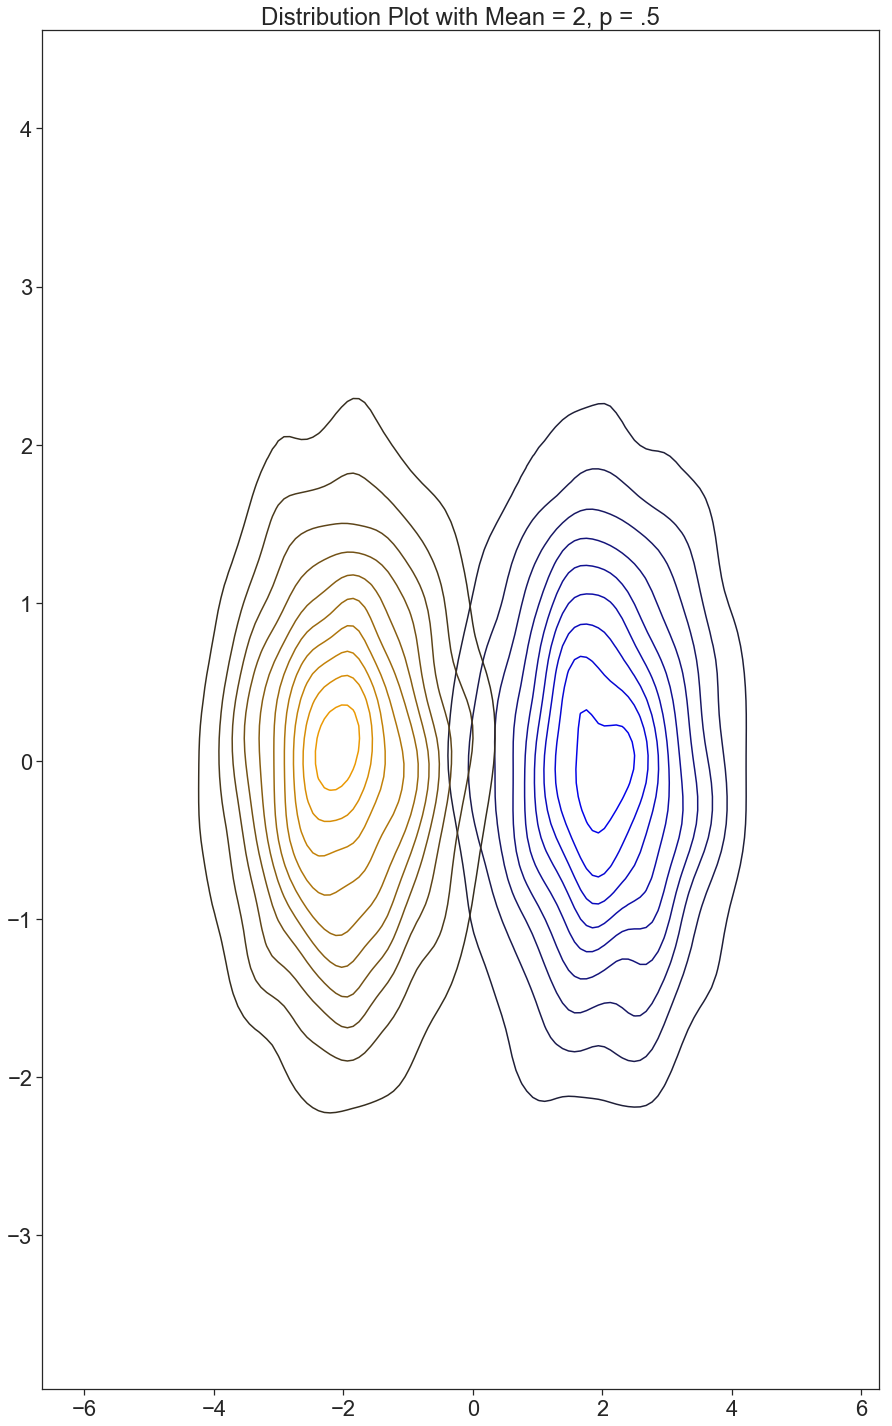

1983
17


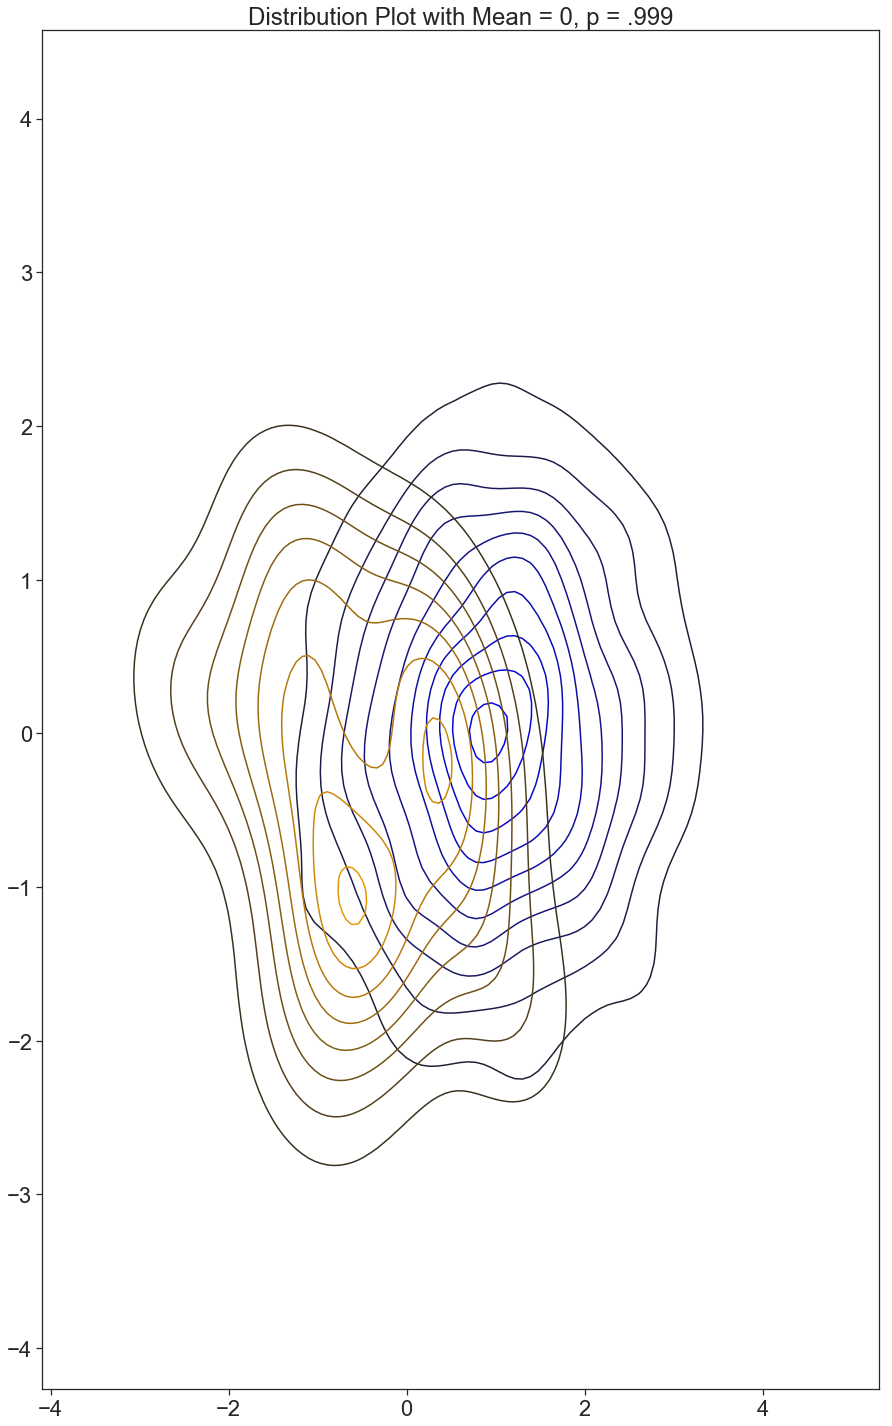

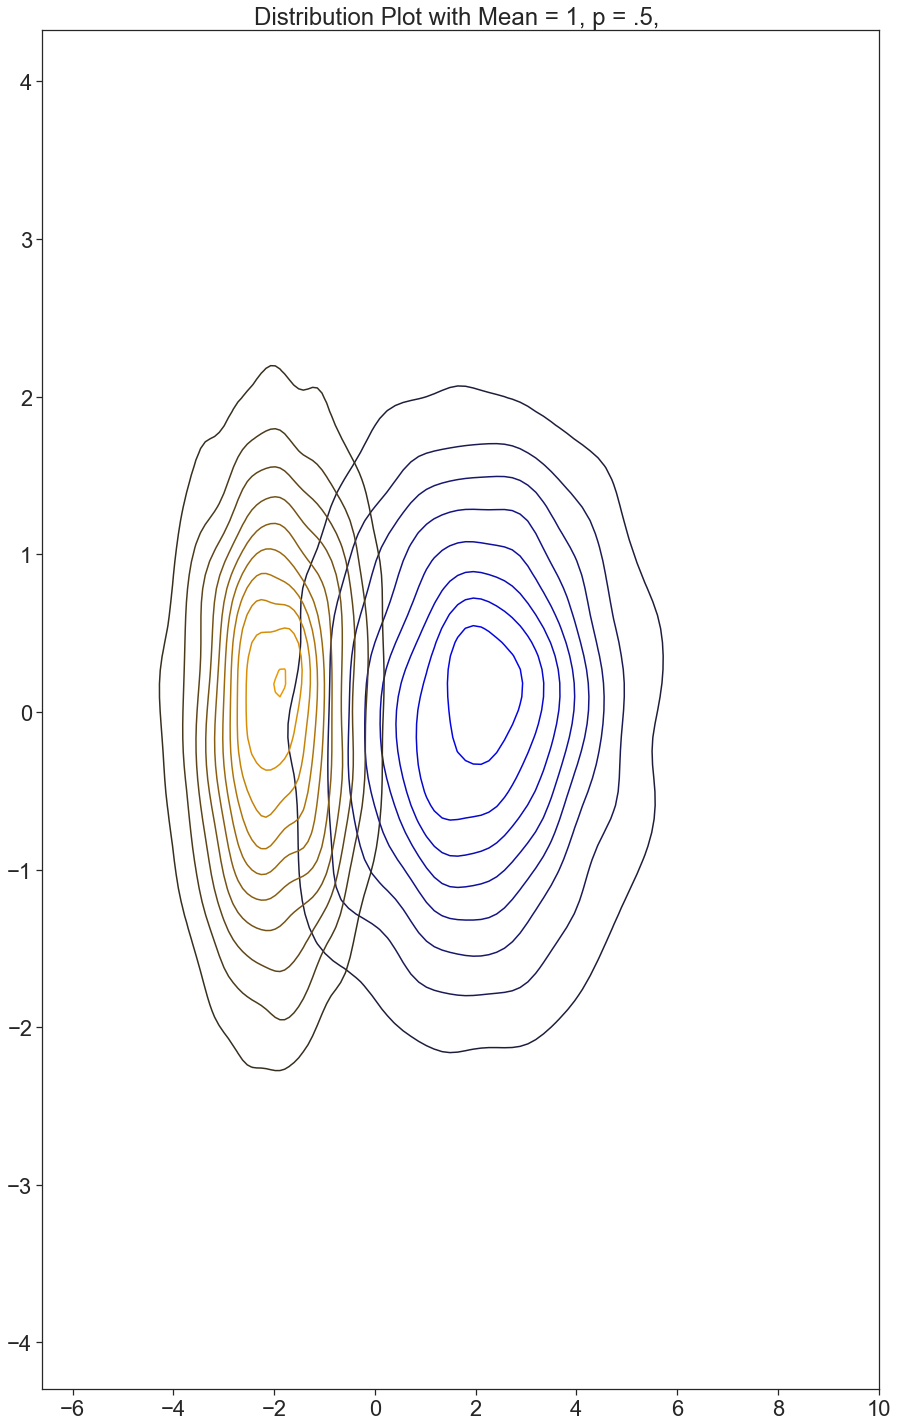

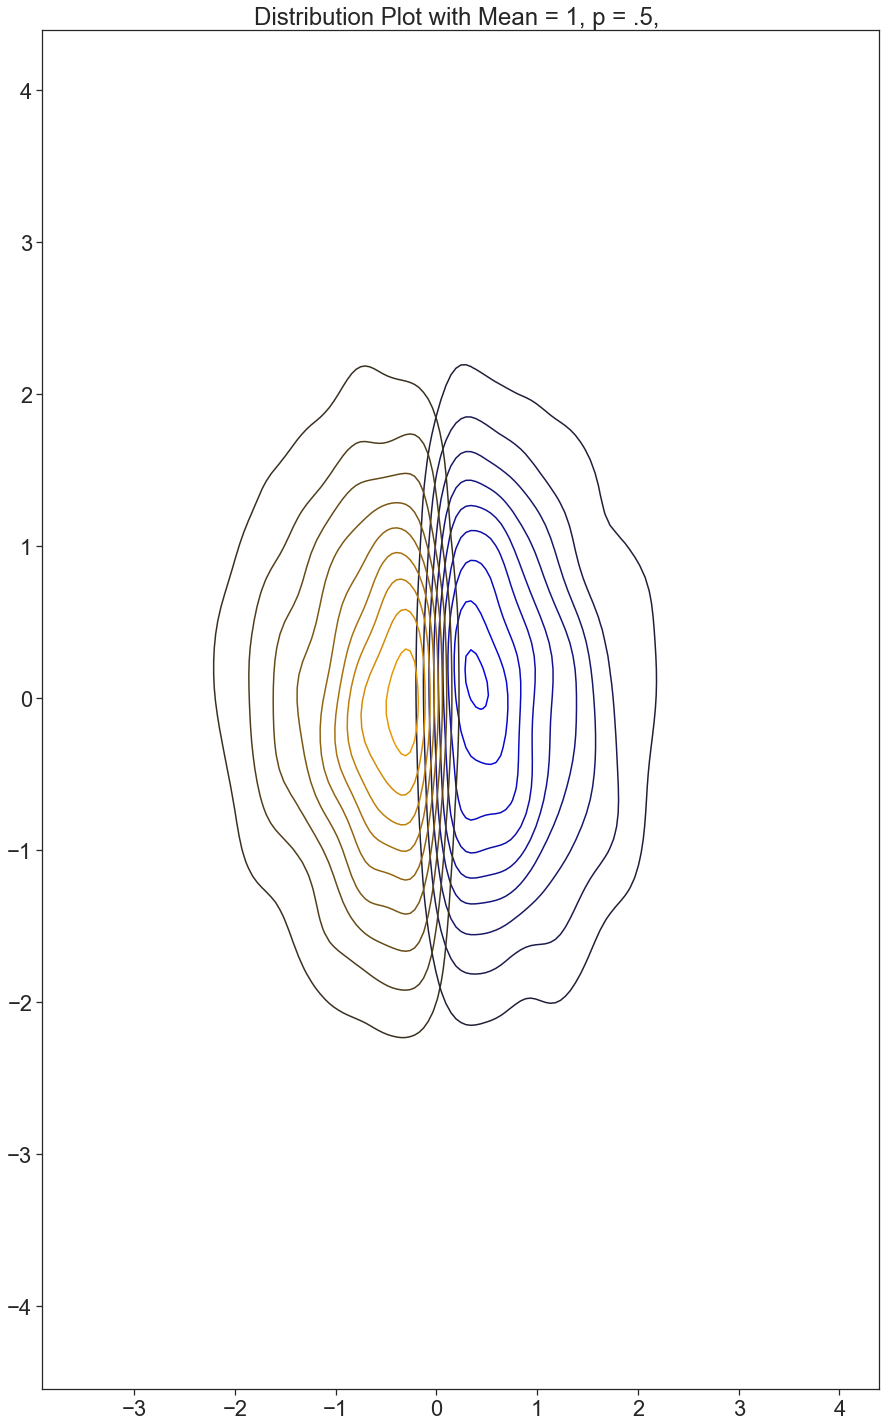

In [12]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

def get_multivariate_sample(n, d, mean, p = .5, spherical = True, truncated = False):
    cov_1 = np.identity(d)
    cov_2 = np.identity(d)
    if not spherical:
        diag = np.ones(d)
        diag[0] = 3
        cov_2 = np.diag(diag)
    x_sample = []
    y_sample = []
    means = np.zeros(d)
    means[0] = mean
        
    while len(y_sample) < n:
        y = np.random.binomial(1, p)
        if (y == 0):
            x = np.random.multivariate_normal(-means, cov_1)                
        else:
            x = np.random.multivariate_normal(means, cov_2)
        if truncated and y == 0 and x[0] > 0:
            continue
        elif truncated and y == 1 and x[0] < 0:
            continue
        else:
            x_sample.append(x.tolist())
            y_sample.append(y)
    return np.array(x_sample), np.array(y_sample)

def split_by_class(sample):
    y_one = [pair for pair in sample if pair[1] == 1]
    y_neg_one = [pair for pair in sample if pair[1] == 0]
    return y_one, y_neg_one

def split_by_class_data(sample):
    y_one = [pair[0] for pair in sample if pair[1] == 1]
    y_neg_one = [pair[0] for pair in sample if pair[1] == 0]
    return y_one, y_neg_one

X, y = get_multivariate_sample(10000, 2, 2)
sample = list(zip(X, y))
class_one, class_neg_one = split_by_class(sample)
sns.kdeplot([x[0] for x in list(zip(*class_one))[0]], [x[1] for x in list(zip(*class_one))[0]], color = "blue")
sns.kdeplot([x[0] for x in list(zip(*class_neg_one))[0]], [x[1] for x in list(zip(*class_neg_one))[0]], color = "orange")
plt.title("Distribution Plot with Mean = 2, p = .5")
plt.show()

X, y = get_multivariate_sample(2000, 2, 1, .99)
sample = list(zip(X, y))
class_one, class_neg_one = split_by_class(sample)
print(len(class_one))
print(len(class_neg_one))
sns.kdeplot([x[0] for x in list(zip(*class_one))[0]], [x[1] for x in list(zip(*class_one))[0]], color = "blue")
sns.kdeplot([x[0] for x in list(zip(*class_neg_one))[0]], [x[1] for x in list(zip(*class_neg_one))[0]], color = "orange")
plt.title("Distribution Plot with Mean = 0, p = .999")
plt.show()

X, y = get_multivariate_sample(10000, 2, 2, .5, False)
sample = list(zip(X, y))
class_one, class_neg_one = split_by_class(sample)
sns.kdeplot([x[0] for x in list(zip(*class_one))[0]], [x[1] for x in list(zip(*class_one))[0]], color = "blue")
sns.kdeplot([x[0] for x in list(zip(*class_neg_one))[0]], [x[1] for x in list(zip(*class_neg_one))[0]], color = "orange")
plt.title("Distribution Plot with Mean = 1, p = .5, ")
plt.show()

X, y = get_multivariate_sample(5000, 2, 0, .5, True, True)
sample = list(zip(X, y))
class_one, class_neg_one = split_by_class(sample)
sns.kdeplot([x[0] for x in list(zip(*class_one))[0]], [x[1] for x in list(zip(*class_one))[0]], color = "blue")
sns.kdeplot([x[0] for x in list(zip(*class_neg_one))[0]], [x[1] for x in list(zip(*class_neg_one))[0]], color = "orange")
plt.title("Distribution Plot with Mean = 1, p = .5, ")
plt.show()


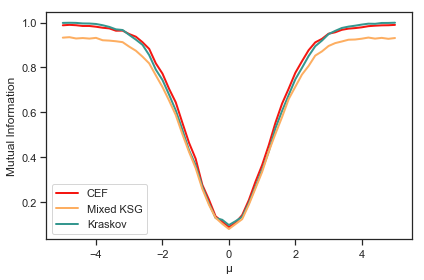

In [2]:
data = pickle.load(open("mi_ellipse.p", "rb"))
cef = data["cef_ellipse"]
kraskov = data["kraskov_ellipse"]
mixed = data["mixed_ellipse"]
means = data["means"]

entropy = -.5*np.log(.5) - .5*np.log(.5)

line_cef, = plt.plot(means, np.array(cef)/entropy, label = "CEF", linewidth = 2, color = "#F41711")
line_kraskov, = plt.plot(means, kraskov, label = "Kraskov", linewidth = 2, color = "#35978f")
line_ksg, = plt.plot(means, mixed/entropy, label = "Mixed KSG", linewidth = 2, color = "#fdae61")


plt.xlabel(u'\u03bc')
plt.ylabel("Mutual Information")
#plt.ylim(ymin = 0)
#plt.ylim(ymax = .9)
plt.legend(handles=[line_cef, line_ksg, line_kraskov])
plt.tight_layout()
plt.savefig("mi_normalized_ellipse_6d.png")
plt.show()

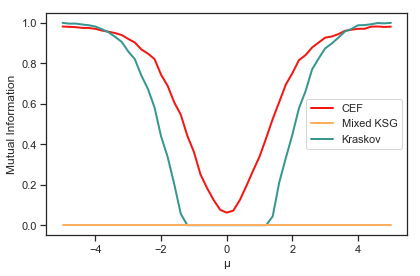

In [19]:
data = pickle.load(open("mi_ellipse_40.p", "rb"))
cef_40 = data["cef_ellipse"]
kraskov_40 = data["kraskov_ellipse"]
mixed_40 = data["mixed_ellipse"]
means = data["means"]

entropy = -.5*np.log(.5) - .5*np.log(.5)

line_cef, = plt.plot(means, np.array(cef_40)/entropy, label = "CEF", linewidth = 2, color = "#F41711")
line_kraskov, = plt.plot(means, kraskov_40, label = "Kraskov", linewidth = 2, color = "#35978f")
line_ksg, = plt.plot(means, mixed_40/entropy, label = "Mixed KSG", linewidth = 2, color = "#fdae61")


plt.xlabel(u'\u03bc')
plt.ylabel("Mutual Information")
#plt.ylim(ymin = 0)
#plt.ylim(ymax = .9)
plt.legend(handles=[line_cef, line_ksg, line_kraskov])
plt.tight_layout()
plt.savefig("mi_normalized_ellipse_40d.png")
plt.show()

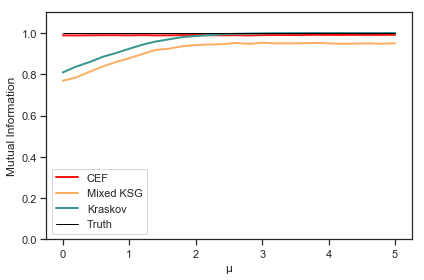

In [4]:
data = pickle.load(open("mi_trunc.p", "rb"))
cef_trunc = data["cef"]
kraskov_trunc = data["kraskov"]
mixed_trunc = data["mixed"]
means_trunc = data["means"]
entropy = -.5*np.log(.5) - .5*np.log(.5)
truth = [1]*len(means_trunc)
line_cef, = plt.plot(means_trunc, np.array(cef_trunc)/entropy, label = "CEF", linewidth = 2, color = "#F41711")
line_kraskov, = plt.plot(means_trunc, kraskov_trunc, label = "Kraskov", linewidth = 2, color = "#35978f")
line_ksg, = plt.plot(means_trunc, mixed_trunc/entropy, label = "Mixed KSG", linewidth = 2, color = "#fdae61")
line_truth, = plt.plot(means_trunc, truth, label = "Truth", linewidth = 1, color = "black")

plt.xlabel(u'\u03bc')
plt.ylabel("Mutual Information")
plt.ylim(ymin = 0)
plt.ylim(ymax = 1.1)
plt.legend(handles=[line_cef, line_ksg, line_kraskov, line_truth])
plt.tight_layout()
plt.savefig("mi_normalized_trunc_6d.png")
plt.show()

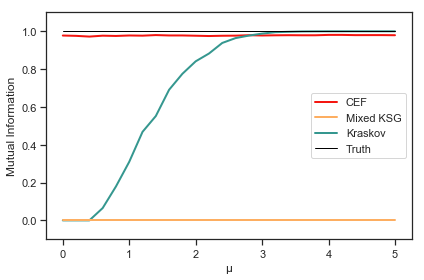

In [5]:
data = pickle.load(open("mi_trunc_40.p", "rb"))
cef_trunc_40 = data["cef"]
kraskov_trunc_40 = data["kraskov"]
mixed_trunc_40 = data["mixed"]
means_trunc_40 = data["means"]
entropy = -.5*np.log(.5) - .5*np.log(.5)

line_cef, = plt.plot(means_trunc, np.array(cef_trunc_40)/entropy, label = "CEF", linewidth = 2, color = "#F41711")
line_kraskov, = plt.plot(means_trunc, kraskov_trunc_40, label = "Kraskov", linewidth = 2, color = "#35978f")
line_ksg, = plt.plot(means_trunc, mixed_trunc_40/entropy, label = "Mixed KSG", linewidth = 2, color = "#fdae61")
line_truth, = plt.plot(means_trunc, truth, label = "Truth", linewidth = 1, color = "black")

plt.xlabel(u'\u03bc')
plt.ylabel("Mutual Information")
plt.ylim(ymin = -.1)
plt.ylim(ymax = 1.1)
plt.legend(handles=[line_cef, line_ksg, line_kraskov, line_truth])
plt.tight_layout()
plt.savefig("mi_normalized_trunc_40d.png")
plt.show()

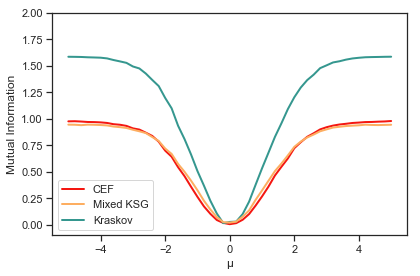

In [50]:
data = pickle.load(open("mi_three_class.p", "rb"))
cef_three = data["cef"]
kraskov_three = data["kraskov"]
mixed_three = data["mixed"]
means = data["means"]
entropy = -1/3*np.log(1/3) - 1/3*np.log(1/3) - 1/3*np.log(1/3)

line_cef, = plt.plot(means, np.array(cef_three)/entropy, label = "CEF", linewidth = 2, color = "#F41711")
line_kraskov, = plt.plot(means, kraskov_three, label = "Kraskov", linewidth = 2, color = "#35978f")
line_ksg, = plt.plot(means, mixed_three/entropy, label = "Mixed KSG", linewidth = 2, color = "#fdae61")

plt.xlabel(u'\u03bc')
plt.ylabel("Mutual Information")
plt.ylim(ymin = -.1)
plt.ylim(ymax = 2.0)
plt.legend(handles=[line_cef, line_ksg, line_kraskov])
plt.tight_layout()
plt.savefig("mi_normalized_three_6d.png")
plt.show()

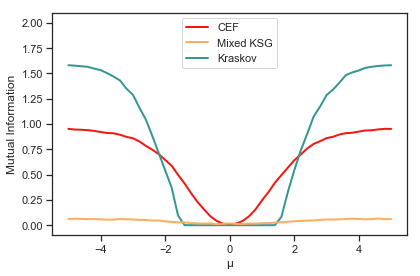

In [49]:
data = pickle.load(open("mi_three_class_40.p", "rb"))
cef_three_40 = data["cef"]
kraskov_three_40 = data["kraskov"]
mixed_three_40 = data["mixed"]
means = data["means"]
entropy = -1/3*np.log(1/3) - 1/3*np.log(1/3) - 1/3*np.log(1/3)

line_cef, = plt.plot(means, np.array(cef_three_40)/entropy, label = "CEF", linewidth = 2, color = "#F41711")
line_kraskov, = plt.plot(means, kraskov_three_40, label = "Kraskov", linewidth = 2, color = "#35978f")
line_ksg, = plt.plot(means, mixed_three_40/entropy, label = "Mixed KSG", linewidth = 2, color = "#fdae61")

plt.xlabel(u'\u03bc')
plt.ylabel("Mutual Information")
plt.ylim(ymin = -.1)
plt.ylim(ymax = 2.1)
plt.legend(handles=[line_cef, line_ksg, line_kraskov])
plt.tight_layout()
plt.savefig("mi_normalized_three_40d.png")
plt.show()

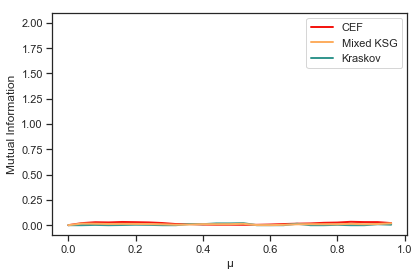

In [52]:
data = pickle.load(open("mi_prob_40.p", "rb"))
cef_prob_40 = data["cef"]
kraskov_prob_40 = data["kraskov"]
mixed_prob_40 = data["mixed"]
probs = data["probs"]
entropy = -1/3*np.log(1/3) - 1/3*np.log(1/3) - 1/3*np.log(1/3)

line_cef, = plt.plot(probs, np.array(cef_prob_40)/entropy, label = "CEF", linewidth = 2, color = "#F41711")
line_kraskov, = plt.plot(probs, kraskov_prob_40, label = "Kraskov", linewidth = 2, color = "#35978f")
line_ksg, = plt.plot(probs, mixed_prob_40/entropy, label = "Mixed KSG", linewidth = 2, color = "#fdae61")

plt.xlabel(u'\u03bc')
plt.ylabel("Mutual Information")
plt.ylim(ymin = -.1)
plt.ylim(ymax = 2.1)
plt.legend(handles=[line_cef, line_ksg, line_kraskov])
plt.tight_layout()
plt.savefig("mi_normalized_prob_40d.png")
plt.show()

# Final Fig:

In [2]:
sns.set(font_scale = 1.8)
sns.set_style("ticks")
plt.rcParams['figure.figsize'] = [15, 15]

In [3]:
ksg_40 = [2.5000208333724202e-05, 2.5000208333724202e-05, 2.5000208333724202e-05, 2.5000208333724202e-05, 2.5000208333724202e-05, 2.5000208333724202e-05, 2.5000208333724202e-05, 2.5000208333724202e-05, 2.5000208333724202e-05, 2.5000208333724202e-05, 2.5000208333724202e-05, 2.5000208333724202e-05, 2.5000208333724202e-05, 2.5000208333724202e-05, 2.5000208333724202e-05, 2.5000208333724202e-05, 2.5000208333724202e-05, 2.5000208333724202e-05, 2.5000208333724202e-05, 2.5000208333724202e-05, 2.5000208333724202e-05, 2.5000208333724202e-05, 2.5000208333724202e-05, 2.5000208333724202e-05, 2.5000208333724202e-05, 2.5000208333724202e-05, 2.5000208333724202e-05, 2.5000208333724202e-05, 2.5000208333724202e-05, 2.5000208333724202e-05, 2.5000208333724202e-05, 2.5000208333724202e-05, 2.5000208333724202e-05, 2.5000208333724202e-05, 2.5000208333724202e-05, 2.5000208333724202e-05, 2.5000208333724202e-05, 2.5000208333724202e-05, 2.5000208333724202e-05, 2.5000208333724202e-05, 2.5000208333724202e-05, 2.5000208333724202e-05, 2.5000208333724202e-05, 2.5000208333724202e-05, 2.5000208333724202e-05, 2.5000208333724202e-05, 2.5000208333724202e-05, 2.5000208333724202e-05, 2.5000208333724202e-05, 2.5000208333724202e-05, 2.5000208333724202e-05]

In [4]:
kraskov_40 = [1.0000214609365372,
 0.9999986733222244,
 1.00001580554283,
 1.0000173059651303,
 0.9999967977546902,
 0.9995252030727215,
 0.9988067607395834,
 0.9989307394187819,
 0.9944666797690189,
 0.9908065503408636,
 0.9869156471862937,
 0.9706095230934864,
 0.9496053896874486,
 0.9073124129020584,
 0.8524048887242799,
 0.768586624680168,
 0.6634438524987303,
 0.528799412786114,
 0.35732001634342225,
 0.15226916766270904,
 0.05812406897661049,
 0.,
 0.,
 0.,
 0.,
 0.,
 0.,
 0.,
 0.,
 0.,
 0.04548867792939859,
 0.14772307178171218,
 0.33455158920307326,
 0.5340914617796102,
 0.6586444799900022,
 0.7745653613346377,
 0.8607384462347483,
 0.9150521638484008,
 0.9492816518052365,
 0.9677988217723907,
 0.9853615950316339,
 0.9915960998552293,
 0.9956172301670136,
 0.9986236217426949,
 0.9991428336189472,
 0.9996984417048509,
 0.9999397430642887,
 1.0000272317470973,
 0.9999339158596285,
 1.000010099602548,
 0.9999965669074697]

In [5]:
ksg = [0.67582312158065, 0.6753830158417373, 0.6755212026241914, 0.6750815624877556, 0.6749790736262449, 0.6751019177135343, 0.6759773085092778, 0.6756110521843239, 0.6742514580982617, 0.6742609672771221, 0.673748255226488, 0.6708320704533255, 0.6654446733984649, 0.6563969834652492, 0.643982903574075, 0.6234303254544172, 0.594697612289535, 0.5526708981152124, 0.48969078669683946, 0.41719426588941133, 0.3349702769400371, 0.25007627091888623, 0.15926703236216427, 0.07746077340630052, 0.02410375261845576, 0.003870378864389339, 0.025269524098349122, 0.07709240661285525, 0.15940885341503877, 0.24480076843566242, 0.33731408502948135, 0.4234748204832131, 0.49488423566295786, 0.547178589833303, 0.5935982442641261, 0.6252838607904839, 0.6447565350482498, 0.6583137568724401, 0.6674333471070255, 0.6719910946494987, 0.6744077816351639, 0.6742782001608295, 0.6757053113725628, 0.6763441299468579, 0.6757549093569294, 0.6747385558663067, 0.6740561219889551, 0.6749668925100226, 0.6748135291779361, 0.676954672535523, 0.6751728545951546]

In [6]:
kraskov = [1.0000267195906574,
 1.0000194483801206,
 0.9999970028162668,
 1.0000286816652846,
 0.9999567520284547,
 1.0000074377896926,
 0.9993845779811412,
 0.9994575886283723,
 0.9991158314500801,
 0.9962658789225962,
 0.9932241102642436,
 0.9895311566293579,
 0.9839485557251191,
 0.9712889586912858,
 0.9471418912095793,
 0.9194403914718272,
 0.8674987247299182,
 0.8008579489515029,
 0.7206384753870108,
 0.6161068592406238,
 0.49659548677936804,
 0.357949007829653,
 0.2241162853866463,
 0.11061271212156676,
 0.03723346251871007,
 0.01362611805547509,
 0.030891275942973806,
 0.11651600102990223,
 0.23608543318966468,
 0.36337163989797716,
 0.477140595701286,
 0.6239253027783906,
 0.7210893540423857,
 0.8120047144065445,
 0.8736670752521913,
 0.9259827154642739,
 0.946259230769515,
 0.9737396241846508,
 0.9846713949308601,
 0.9880041569312574,
 0.9958322337963192,
 0.9970999217182417,
 0.999623790151615,
 0.9996597184081111,
 0.9996027698384022,
 1.0000357148142864,
 1.0000055911413561,
 1.0000319133008997,
 0.9998563186857901,
 0.9999695878716199,
 1.0000351954452054]

In [7]:
import pickle 

data = pickle.load(open("cache/mutual_info_cef.p", "rb"))
cef = data["mutual_infos"][25:]
means = data["means"][25:]
#truths = data["truths"]

data_40 = pickle.load(open("cache/mutual_info_cef_40d.p", "rb"))
cef_40 = data_40["mutual_infos"][25:]
means_40 = data_40["means"][25:]
truths = data_40["truth"][25:]

data_e = pickle.load(open("cache/mi_ellipse.p", "rb"))
cef_e = data_e["cef_ellipse"][25:]
kraskov_e = data_e["kraskov_ellipse"][25:]
mixed_e = data_e["mixed_ellipse"][25:]
means_e = data_e["means"][25:]
entropy_e = -.5*np.log(.5) - .5*np.log(.5)

data_e_40 = pickle.load(open("cache/mi_ellipse_40.p", "rb"))
cef_e_40 = data_e_40["cef_ellipse"][25:]
kraskov_e_40 = data_e_40["kraskov_ellipse"][25:]
mixed_e_40 = data_e_40["mixed_ellipse"][25:]
means_e_40 = data_e_40["means"][25:]

data_trunc = pickle.load(open("cache/mi_trunc.p", "rb"))
cef_trunc = data_trunc["cef"]
kraskov_trunc = data_trunc["kraskov"]
mixed_trunc = data_trunc["mixed"]
means_trunc = data_trunc["means"]
entropy_trunc = -.5*np.log(.5) - .5*np.log(.5)
truth_trunc = [1]*len(means_trunc)

data_trunc_40 = pickle.load(open("cache/mi_trunc_40.p", "rb"))
cef_trunc_40 = data_trunc_40["cef"]
kraskov_trunc_40 = data_trunc_40["kraskov"]
mixed_trunc_40 = data_trunc_40["mixed"]
means_trunc_40 = data_trunc_40["means"]
entropy_trunc_40 = -.5*np.log(.5) - .5*np.log(.5)

data_p = pickle.load(open("mi_prob.p", "rb"))
cef_p = data_p["cef"]
kraskov_p = data_p["kraskov"]
mixed_p = data_p["mixed"]
probs = data_p["probs"]

data_p_40 = pickle.load(open("mi_prob_40.p", "rb"))
cef_p_40 = data_p_40["cef"]
kraskov_p_40 = data_p_40["kraskov"]
print(kraskov_p_40)
mixed_p_40 = data_p_40["mixed"]


data = pickle.load(open("mi_three_class_mi.p", "rb"))
cef_three = data["cef"]
kraskov_three = data["kraskov"]
mixed_three = data["mixed"]
#means = data["means"]
for i in range(len(kraskov_three)):
    if kraskov_three[i] > 1:
        kraskov_three[i] = 1

data = pickle.load(open("mi_three_class_40_mi.p", "rb"))
cef_three_40 = data["cef"]
kraskov_three_40 = data["kraskov"]
mixed_three_40 = data["mixed"]
means_three = data["means"]
for i in range(len(kraskov_three_40)):
    if kraskov_three_40[i] > 1:
        kraskov_three_40[i] = 1

entropy_three = -1/3*np.log(1/3) - 1/3*np.log(1/3) - 1/3*np.log(1/3)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [8]:
truths_e=[0, 0, 0, 0, 0, 0.0009661587181420961, 0.06400205588053509, 0.12465203578403228, 0.18031864269576736, 0.229525023057079, 0.2716562643482424, 0.3067131551005481, 0.3351166746043356, 0.35755226758129266, 0.3748440049746339, 0.3878559840609349, 0.3974202934894814, 0.40428979931896103, 0.4091124074798803, 0.4124223573181841, 0.41464374012123517, 0.4161017250441711, 0.4170376994105841, 0.41762546039731674, 0.4179865381470037, 0.4182035558949274]

In [9]:
truths_p=[0, -0.2582772469333816,
 -0.18837221247894043,
 -0.12934883771250916,
 -0.07754698844452623,
 -0.031233386821665654,
 0.010608631059595974,
 0.048647124850824675,
 0.08335351918822936,
 0.11507724880731518,
 0.14408606332507468,
 0.17059160121826666,
 0.19476356787385918,
 0.21674055691830674,
 0.2366369572343613,
 0.25454794184177987,
 0.27055309735931277,
 0.28471911766804203,
 0.29710183458058814,
 0.30774776635099443,
 0.3166953067961429,
 0.32397563997903966,
 0.3296134400392592,
 0.3336273982452863,
 0.3360306068768478,
 0.3368308203468321]

In [10]:
def three_class_multivariate(n, d, mean):
    mean_1 = np.zeros(d)
    mean_1[0] = mean
    mean_2 = np.zeros(d)
    mean_2[0] = -mean
    mean_3 = np.zeros(d)
    mean_3[1] = mean
    x_sample = []
    y_sample = []
    for i in range(n):
        y = np.random.multinomial(1, [1/3.]*3).flatten()
        y = np.argwhere(y == 1).item()
        if y == 0:
            x = np.random.multivariate_normal(mean_1, np.identity(d))
        elif y == 1:
            x = np.random.multivariate_normal(mean_2, np.identity(d))
        else:
            x = np.random.multivariate_normal(mean_3, np.identity(d))
        x_sample.append(x.tolist())
        y_sample.append(y)
    return np.array(x_sample), np.array(y_sample)

def split_by_class_3(sample):
    y_one = [pair[0] for pair in sample if pair[1] == 0]
    y_two = [pair[0] for pair in sample if pair[1] == 1]
    y_three = [pair[0] for pair in sample if pair[1] == 2]
    return y_one, y_two, y_three
    

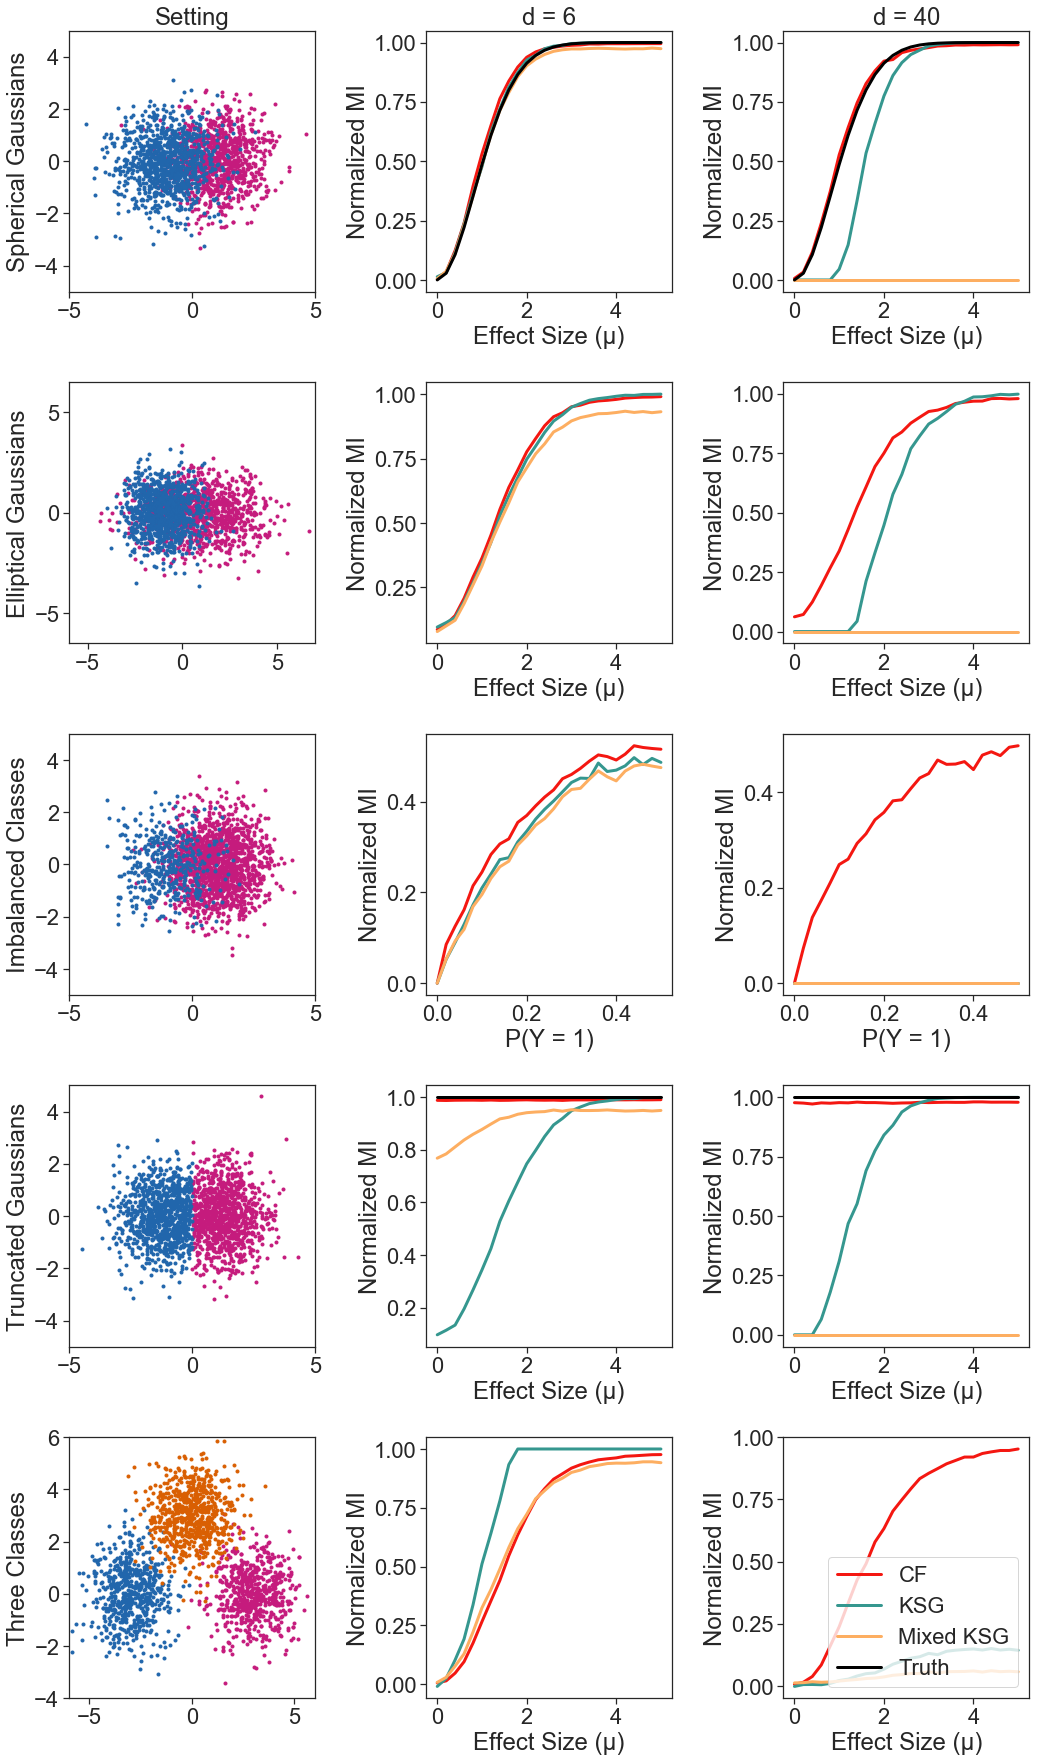

In [15]:
import pandas as pd
sns.set(font_scale = 2.0)
sns.set_style("ticks")
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['figure.figsize'] = [15, 25]
fig, ax = plt.subplots(5, 3)


X, y = get_multivariate_sample(2000, 2, 1)
sample = list(zip(X, y))
class_one, class_neg_one = split_by_class_data(sample)

df_one = pd.DataFrame(class_one, columns=["x", "y"])
df_negone = pd.DataFrame(class_neg_one, columns=["x", "y"])
ax[0, 0].scatter(x="x", y="y", data=df_one, color = "#c51b7d", marker = ".");
ax[0, 0].scatter(x="x", y="y", data=df_negone, color = "#2166ac", marker = ".");
ax[0, 0].set_ylim(bottom = -5)
ax[0, 0].set_ylim(top = 5)
ax[0, 0].set_xlim(left = -5)
ax[0, 0].set_xlim(right = 5)
ax[0, 0].set_ylabel("Spherical Gaussians")

X, y = get_multivariate_sample(2000, 2, 1, .5, False)
sample = list(zip(X, y))
class_one, class_neg_one = split_by_class_data(sample)
df_one = pd.DataFrame(class_one, columns=["x", "y"])
df_negone = pd.DataFrame(class_neg_one, columns=["x", "y"])
ax[1, 0].scatter(x="x", y="y", data=df_one, color = "#c51b7d", marker = ".");
ax[1, 0].scatter(x="x", y="y", data=df_negone, color = "#2166ac", marker = ".");
ax[1, 0].set_ylim(bottom = -6.5)
ax[1, 0].set_ylim(top = 6.5)
ax[1, 0].set_xlim(left = -6)
ax[1, 0].set_xlim(right = 7)
ax[1, 0].set_ylabel("Elliptical Gaussians")

X, y = three_class_multivariate(2000, 2, 3)
sample = list(zip(X, y))
class_one, class_two, class_three = split_by_class_3(sample)
df_one = pd.DataFrame(class_one, columns=["x", "y"])
df_two = pd.DataFrame(class_two, columns=["x", "y"])
df_three = pd.DataFrame(class_three, columns=["x", "y"])
ax[4, 0].scatter(x="x", y="y", data=df_one, color = "#c51b7d", marker = ".");
ax[4, 0].scatter(x="x", y="y", data=df_two, color = "#2166ac", marker = ".");
ax[4, 0].scatter(x="x", y="y", data=df_three, color = "#d95f02", marker = ".");
ax[4, 0].set_ylim(bottom = -4)
ax[4, 0].set_ylim(top = 6)
ax[4, 0].set_xlim(left = -6)
ax[4, 0].set_xlim(right = 6)
ax[4, 0].set_ylabel("Three Classes")

X, y = get_multivariate_sample(2000, 2, 1, .5, True, True)
sample = list(zip(X, y))
class_one, class_neg_one = split_by_class_data(sample)
df_one = pd.DataFrame(class_one, columns=["x", "y"])
df_negone = pd.DataFrame(class_neg_one, columns=["x", "y"])
ax[3, 0].scatter(x="x", y="y", data=df_one, color = "#c51b7d", marker = ".");
ax[3, 0].scatter(x="x", y="y", data=df_negone, color = "#2166ac", marker = ".");
ax[3, 0].set_ylim(bottom = -5)
ax[3, 0].set_ylim(top = 5)
ax[3, 0].set_xlim(left = -5)
ax[3, 0].set_xlim(right = 5)
ax[3, 0].set_ylabel("Truncated Gaussians")

X, y = get_multivariate_sample(2000, 2, 1, .8)
sample = list(zip(X, y))
class_one, class_neg_one = split_by_class_data(sample)
df_one = pd.DataFrame(class_one, columns=["x", "y"])
df_negone = pd.DataFrame(class_neg_one, columns=["x", "y"])
ax[2, 0].scatter(x="x", y="y", data=df_one, color = "#c51b7d", marker = ".");
ax[2, 0].scatter(x="x", y="y", data=df_negone, color = "#2166ac", marker = ".");
ax[2, 0].set_ylim(bottom = -5)
ax[2, 0].set_ylim(top = 5)
ax[2, 0].set_xlim(left = -5)
ax[2, 0].set_xlim(right = 5)
ax[2, 0].set_ylabel("Imbalanced Classes")

ax[0, 1].plot(means, np.array(cef)/entropy_e, label = "CEF", linewidth = 3, color = "#F41711")
ax[0, 1].plot(means, kraskov[25:], label = "KSG", linewidth = 3, color = "#35978f")
ax[0, 1].plot(means, ksg[25:]/entropy_e, label = "Mixed KSG", linewidth = 3, color = "#fdae61")
ax[0, 1].plot(means, truths/entropy_e, label = "Truth", linewidth = 3, color = "black")
ax[0, 1].set_xlabel("Effect Size " + u'(\u03bc)')
ax[0, 1].set_ylabel("Normalized MI")

line_cef, = ax[0, 2].plot(means, np.array(cef_40)/entropy_e, label = "CF", linewidth = 3, color = "#F41711")
line_kraskov, = ax[0, 2].plot(means, kraskov_40[25:], label = "KSG", linewidth = 3, color = "#35978f")
line_ksg, = ax[0, 2].plot(means, ksg_40[25:]/entropy_e, label = "Mixed KSG", linewidth = 3, color = "#fdae61")
line_truth, = ax[0, 2].plot(means, truths/entropy_e, label = "Truth", linewidth = 3, color = "black")
ax[0, 2].set_xlabel("Effect Size " + u'(\u03bc)')
ax[0, 2].set_ylabel("Normalized MI")


ax[1, 1].plot(means_e, np.array(cef_e)/entropy_e, label = "CEF", linewidth = 3, color = "#F41711")
ax[1, 1].plot(means_e, kraskov_e, label = "Kraskov", linewidth = 3, color = "#35978f")
ax[1, 1].plot(means_e, mixed_e/entropy_e, label = "Mixed KSG", linewidth = 3, color = "#fdae61")
#ax[1, 1].plot(means_e, truths_e/entropy_e, label = "Truth", linewidth = 3, color = "black")
ax[1, 1].set_xlabel("Effect Size " + u'(\u03bc)')
ax[1, 1].set_ylabel("Normalized MI")

ax[1, 2].plot(means_e, np.array(cef_e_40)/entropy_e, label = "CEF", linewidth = 3, color = "#F41711")
ax[1, 2].plot(means_e, kraskov_e_40, label = "Kraskov", linewidth = 3, color = "#35978f")
ax[1, 2].plot(means_e, mixed_e_40/entropy_e, label = "Mixed KSG", linewidth = 3, color = "#fdae61")
ax[1, 2].set_xlabel("Effect Size " + u'(\u03bc)')
ax[1, 2].set_ylabel("Normalized MI")

ax[4, 1].plot(means_three[25:], np.array(cef_three[25:])/entropy_three, label = "CEF", linewidth = 3, color = "#F41711")
ax[4, 1].plot(means_three[25:], kraskov_three[25:], label = "Kraskov", linewidth = 3, color = "#35978f")
ax[4, 1].plot(means_three[25:], mixed_three[25:]/entropy_three, label = "Mixed KSG", linewidth = 3, color = "#fdae61")
ax[4, 1].set_xlabel("Effect Size " + u'(\u03bc)')
ax[4, 1].set_ylabel("Normalized MI")

ax[4, 2].plot(means_three[25:], np.array(cef_three_40)[25:]/entropy_three, label = "CEF", linewidth = 3, color = "#F41711")
ax[4, 2].plot(means_three[25:], kraskov_three_40[25:], label = "Kraskov", linewidth = 3, color = "#35978f")
ax[4, 2].plot(means_three[25:], mixed_three_40[25:]/entropy_three, label = "Mixed KSG", linewidth = 3, color = "#fdae61")
ax[4, 2].set_xlabel("Effect Size " + u'(\u03bc)')
ax[4, 2].set_ylabel("Normalized MI")


ax[3, 1].plot(means_e, np.array(cef_trunc)/entropy_e, label = "CEF", linewidth = 3, color = "#F41711")
ax[3, 1].plot(means_e, kraskov_e, label = "Kraskov", linewidth = 3, color = "#35978f")
ax[3, 1].plot(means_e, mixed_trunc/entropy_e, label = "Mixed KSG", linewidth = 3, color = "#fdae61")
ax[3, 1].plot(means_e, truth_trunc, label = "Truth", linewidth = 3, color = "black")
ax[3, 1].set_xlabel("Effect Size " + u'(\u03bc)')
ax[3, 1].set_ylabel("Normalized MI")


ax[3, 2].plot(means_e, np.array(cef_trunc_40)/entropy_e, label = "CEF", linewidth = 3, color = "#F41711")
ax[3, 2].plot(means_e, kraskov_trunc_40, label = "Kraskov", linewidth = 3, color = "#35978f")
ax[3, 2].plot(means_e, mixed_trunc_40/entropy_e, label = "Mixed KSG", linewidth = 3, color = "#fdae61")
ax[3, 2].plot(means_e, truth_trunc, label = "Truth", linewidth = 3, color = "black")
ax[3, 2].set_xlabel("Effect Size " + u'(\u03bc)')
ax[3, 2].set_ylabel("Normalized MI")

ax[2, 1].plot(probs, np.array(cef_p)/entropy_e, label = "CEF", linewidth = 3, color = "#F41711")
ax[2, 1].plot(probs, kraskov_p, label = "Kraskov", linewidth = 3, color = "#35978f")
ax[2, 1].plot(probs, mixed_p/entropy_e, label = "Mixed KSG", linewidth = 3, color = "#fdae61")
#ax[3, 1].plot(probs, truths_p, label = "Truth", linewidth = 2, color = "black")
ax[2, 1].set_xlabel("P(Y = 1)")
ax[2, 1].set_ylabel("Normalized MI")

ax[2, 2].plot(probs, np.array(cef_p_40)/entropy_e, label = "CEF", linewidth = 3, color = "#F41711")
ax[2, 2].plot(probs, kraskov_p_40, label = "Kraskov", linewidth = 3, color = "#35978f")
ax[2, 2].plot(probs, mixed_p_40/entropy_e, label = "Mixed KSG", linewidth = 3, color = "#fdae61")
ax[2, 2].set_xlabel("P(Y = 1)")
ax[2, 2].set_ylabel("Normalized MI")


ax[0, 0].set_title("Setting")
ax[0, 1].set_title("d = 6")
ax[0, 2].set_title("d = 40")

plt.legend(handles=[line_cef, line_kraskov, line_ksg, line_truth,], loc = 'lower right')
fig.tight_layout()
plt.savefig("mi_normalized_all_three_different_xlabels.pdf")
plt.show()
